In [1]:
def show_data(ax,x0,x1,t):
#     for i in range(len(x0)):
#         ax.plot([x0[i],x0[i]],[x1[i],x1[i]],[0,t[i]], color = "gray")
    ax.plot(x0, x1,t,color = "white", marker='.', markersize = 15, linestyle='None', markeredgecolor="red")
    

def show_plane(ax,W,X0_min,X0_max,X1_min,X1_max):
    px0 = np.linspace(X0_min,X0_max,5)
    px1 = np.linspace(X1_min,X1_max,5)
    px0, px1 = np.meshgrid(px0,px1)
    y = W[0] * px0 + W[1] * px1 + W[2]
    ax.plot_surface(px0, px1, y, rstride =1, cstride = 1,alpha = 0.3, color = "blue", edgecolor="black")
    
def mse_plane(x0,x1,t,w):
    y = w[0] * x0 + w[1] * x1 + w[2]
    print(x0)
    mse = np.mean((y - t) ** 2)
    return mse

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

f = open('data.ply')
lines = f.readlines()
lines = lines[11:]
llines = []
for ll in lines:
    
    if ll.find("100000") == -1:
        llines.append(ll[:-1])

X = np.zeros((len(llines),3))
t = np.zeros(len(llines))
for i, l in enumerate(llines):
    l = l.split()
#     print(type(l[0]))
    # x
    X[i,0] = l[0]
    # y
    X[i,1] = l[1]
    # b
    X[i,2] =1
    # z
    t[i] = l[2]

X0_min = np.min(X[:,0])
X0_max = np.max(X[:,0])

X1_min = np.min(X[:,1])
X1_max = np.max(X[:,1])
# print(type(X1_min))
W = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,t))

print("W:{0}".format(W))
print("X0_min: {0},X0_max: {1}".format(X0_min,X0_max))
print("X1_min: {0},X1_max: {1}".format(X1_min,X1_max))

W:[  0.1847898    0.06416968 -29.72584371]
X0_min: 663.416,X0_max: 5184.76
X1_min: -2307.82,X1_max: 3465.17


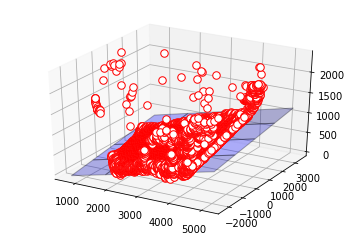

In [5]:
ax = plt.subplot(111,projection = "3d")
show_plane(ax,W,X0_min,X0_max,X1_min,X1_max)
show_data(ax,X[:,0],X[:,1],t)
plt.show()

In [6]:
y = W[0] * 1000 + W[1] * 3000 + W[2]
y

347.5729956031203

In [15]:
mse = mse_plane(X[:,0],X[:,1],t,W)
print("SD{0}".format(np.sqrt(mse)))

[1112.81 1128.39 1137.54 ... 4622.72 4857.84 3788.57]
SD86.84282910963707


In [3]:
# offerbox
import pandas as pd

df = pd.read_csv("offerbox.csv")
s = df["検索"][0:26]
p = df["プロフィール"][0:26]
o = df["オファー"][0:26]

X = np.zeros((len(s),3))
t = np.zeros(len(s))
for i in range(len(s)):
    # x
    X[i,0] = s[i]
    # y
    X[i,1] = p[i]
    # b
    X[i,2] =1
    # z
    t[i] = o[i]

X0_min = np.min(X[:,0])
X0_max = np.max(X[:,0])

X1_min = np.min(X[:,1])
X1_max = np.max(X[:,1])

W = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,t))

print("W:{0}".format(W))
print("X0_min: {0},X0_max: {1}".format(X0_min,X0_max))
print("X1_min: {0},X1_max: {1}".format(X1_min,X1_max))

W:[-0.01895123  0.37783152  0.06810269]
X0_min: 0.0,X0_max: 14.0
X1_min: 0.0,X1_max: 4.0


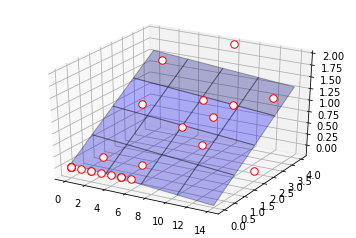

In [4]:
ax = plt.subplot(111,projection = "3d")
show_plane(ax,W,X0_min,X0_max,X1_min,X1_max)
show_data(ax,X[:,0],X[:,1],t)
plt.show()

In [7]:
y = W[0] * 6 + W[1] * 3 + W[2]
y

1.0878898799620167